# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle. 

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [28]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [29]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

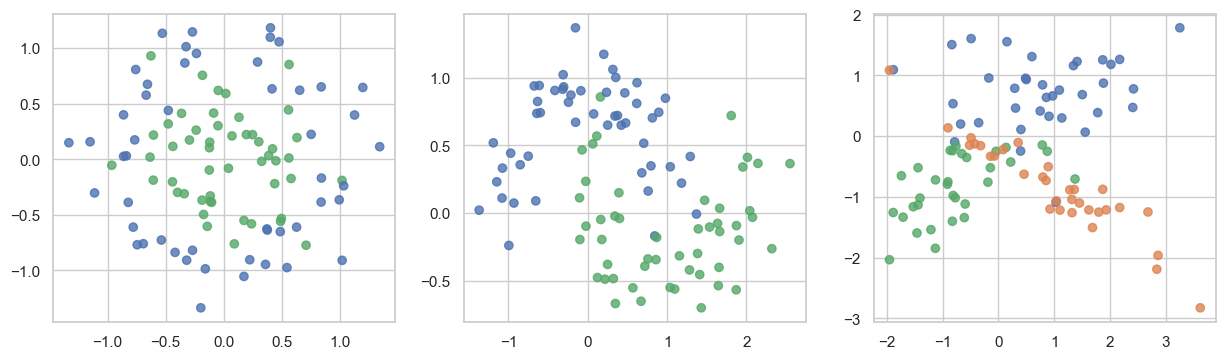

In [30]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [32]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

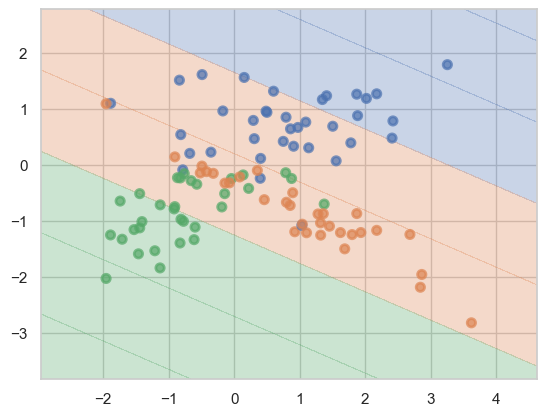

In [33]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Circles:
  Accuracy на обучающей выборке: 1.0000
  Accuracy на тестовой выборке: 0.8000
  Разница, переобучение: 0.2000

Moons:
  Accuracy на обучающей выборке: 1.0000
  Accuracy на тестовой выборке: 0.9600
  Разница, переобучение: 0.0400

Classification:
  Accuracy на обучающей выборке: 1.0000
  Accuracy на тестовой выборке: 0.7600
  Разница, переобучение: 0.2400



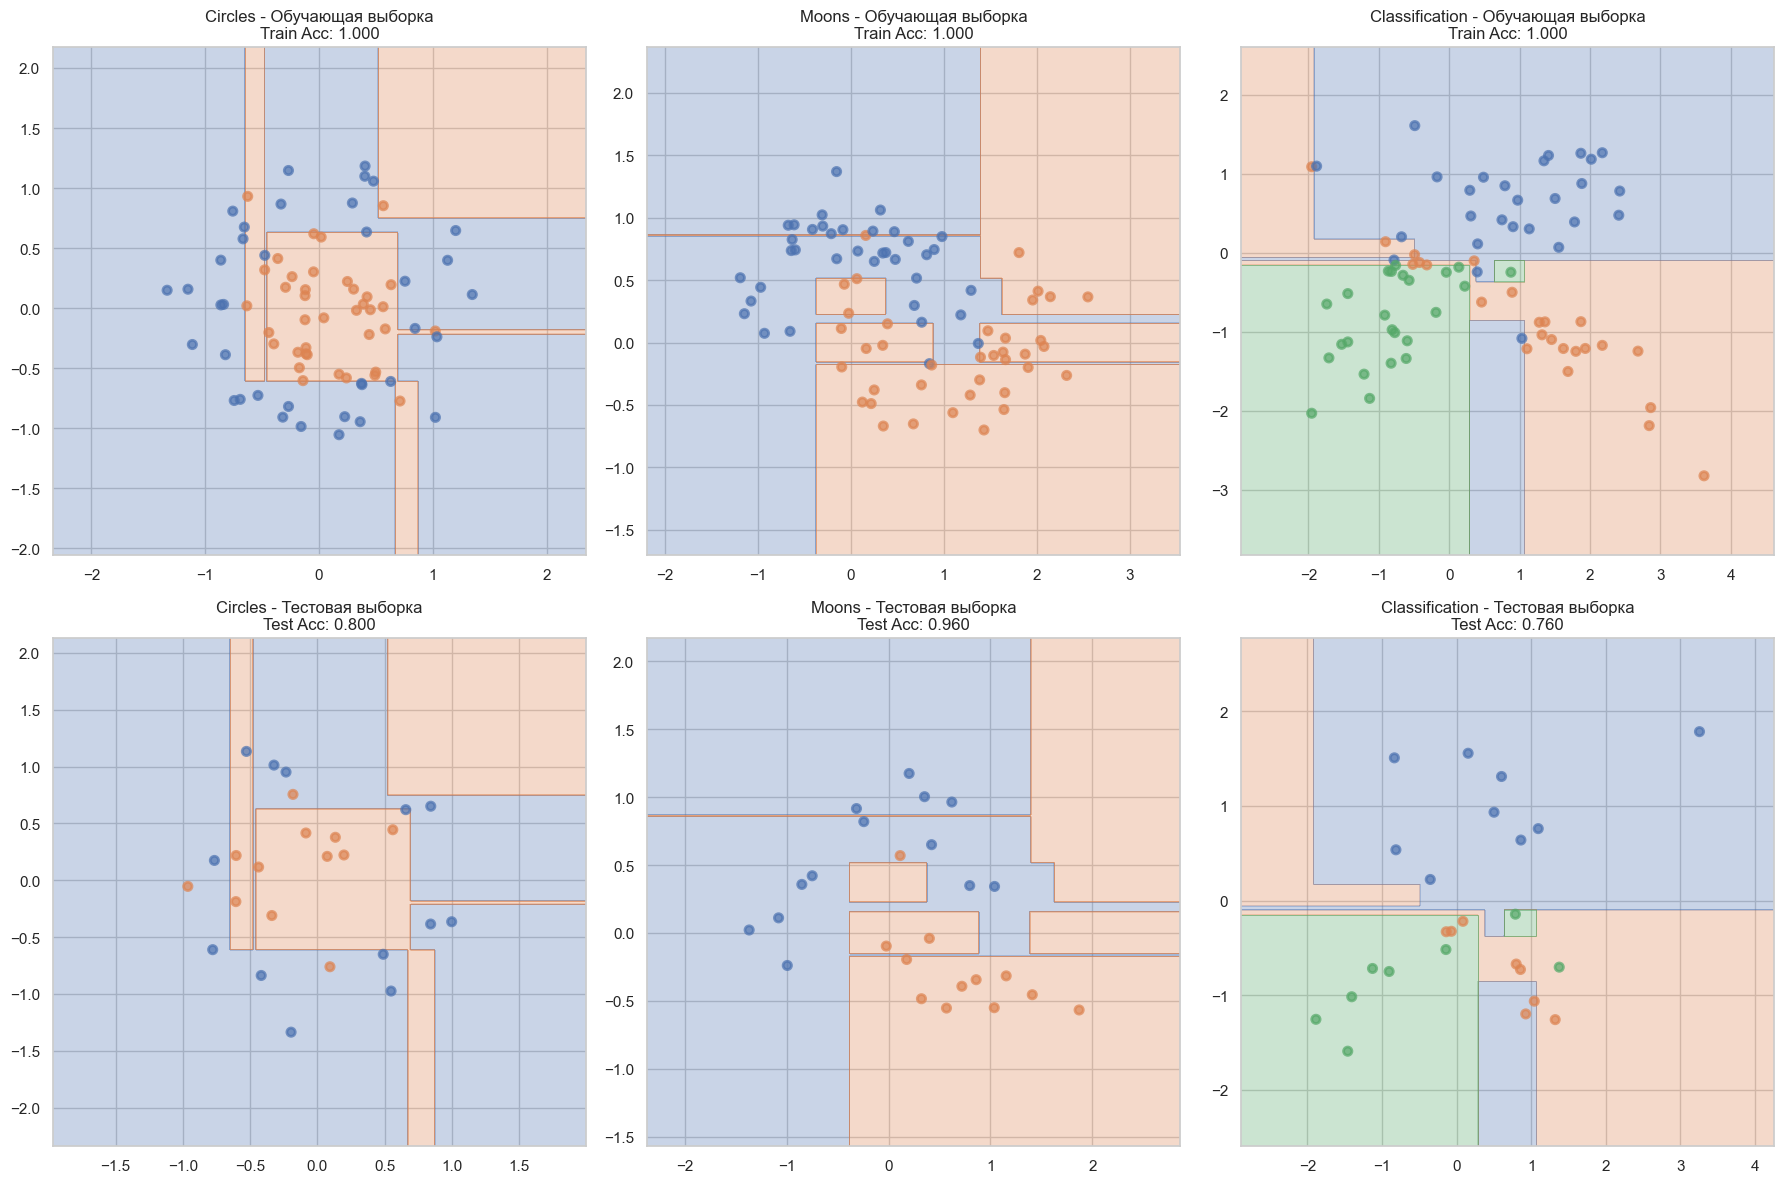

In [34]:
from sklearn.metrics import accuracy_score

names = ['Circles', 'Moons', 'Classification']
plt.figure(figsize=(18, 12))

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                        random_state=42, stratify=y)
    
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_train, y_train)
    
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"{names[i]}:")
    print(f"  Accuracy на обучающей выборке: {train_accuracy:.4f}")
    print(f"  Accuracy на тестовой выборке: {test_accuracy:.4f}")
    print(f"  Разница, переобучение: {train_accuracy - test_accuracy:.4f}")
    print()
    
    plt.subplot(2, 3, i + 1)
    plot_surface(tree, X_train, y_train)
    plt.title(f'{names[i]} - Обучающая выборка\nTrain Acc: {train_accuracy:.3f}')
    
    plt.subplot(2, 3, i + 4)
    plot_surface(tree, X_test, y_test)
    plt.title(f'{names[i]} - Тестовая выборка\nTest Acc: {test_accuracy:.3f}')

plt.tight_layout()
plt.show()


__Ответ:__

Два из трех классификаторов (Circles и Classification) показали сильное переобучение с разницей между обучающей и тестовой выборкой более 20%. Дерево на Moons оказалось наименее переобученным.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?


ДАТАСЕТ: Circles


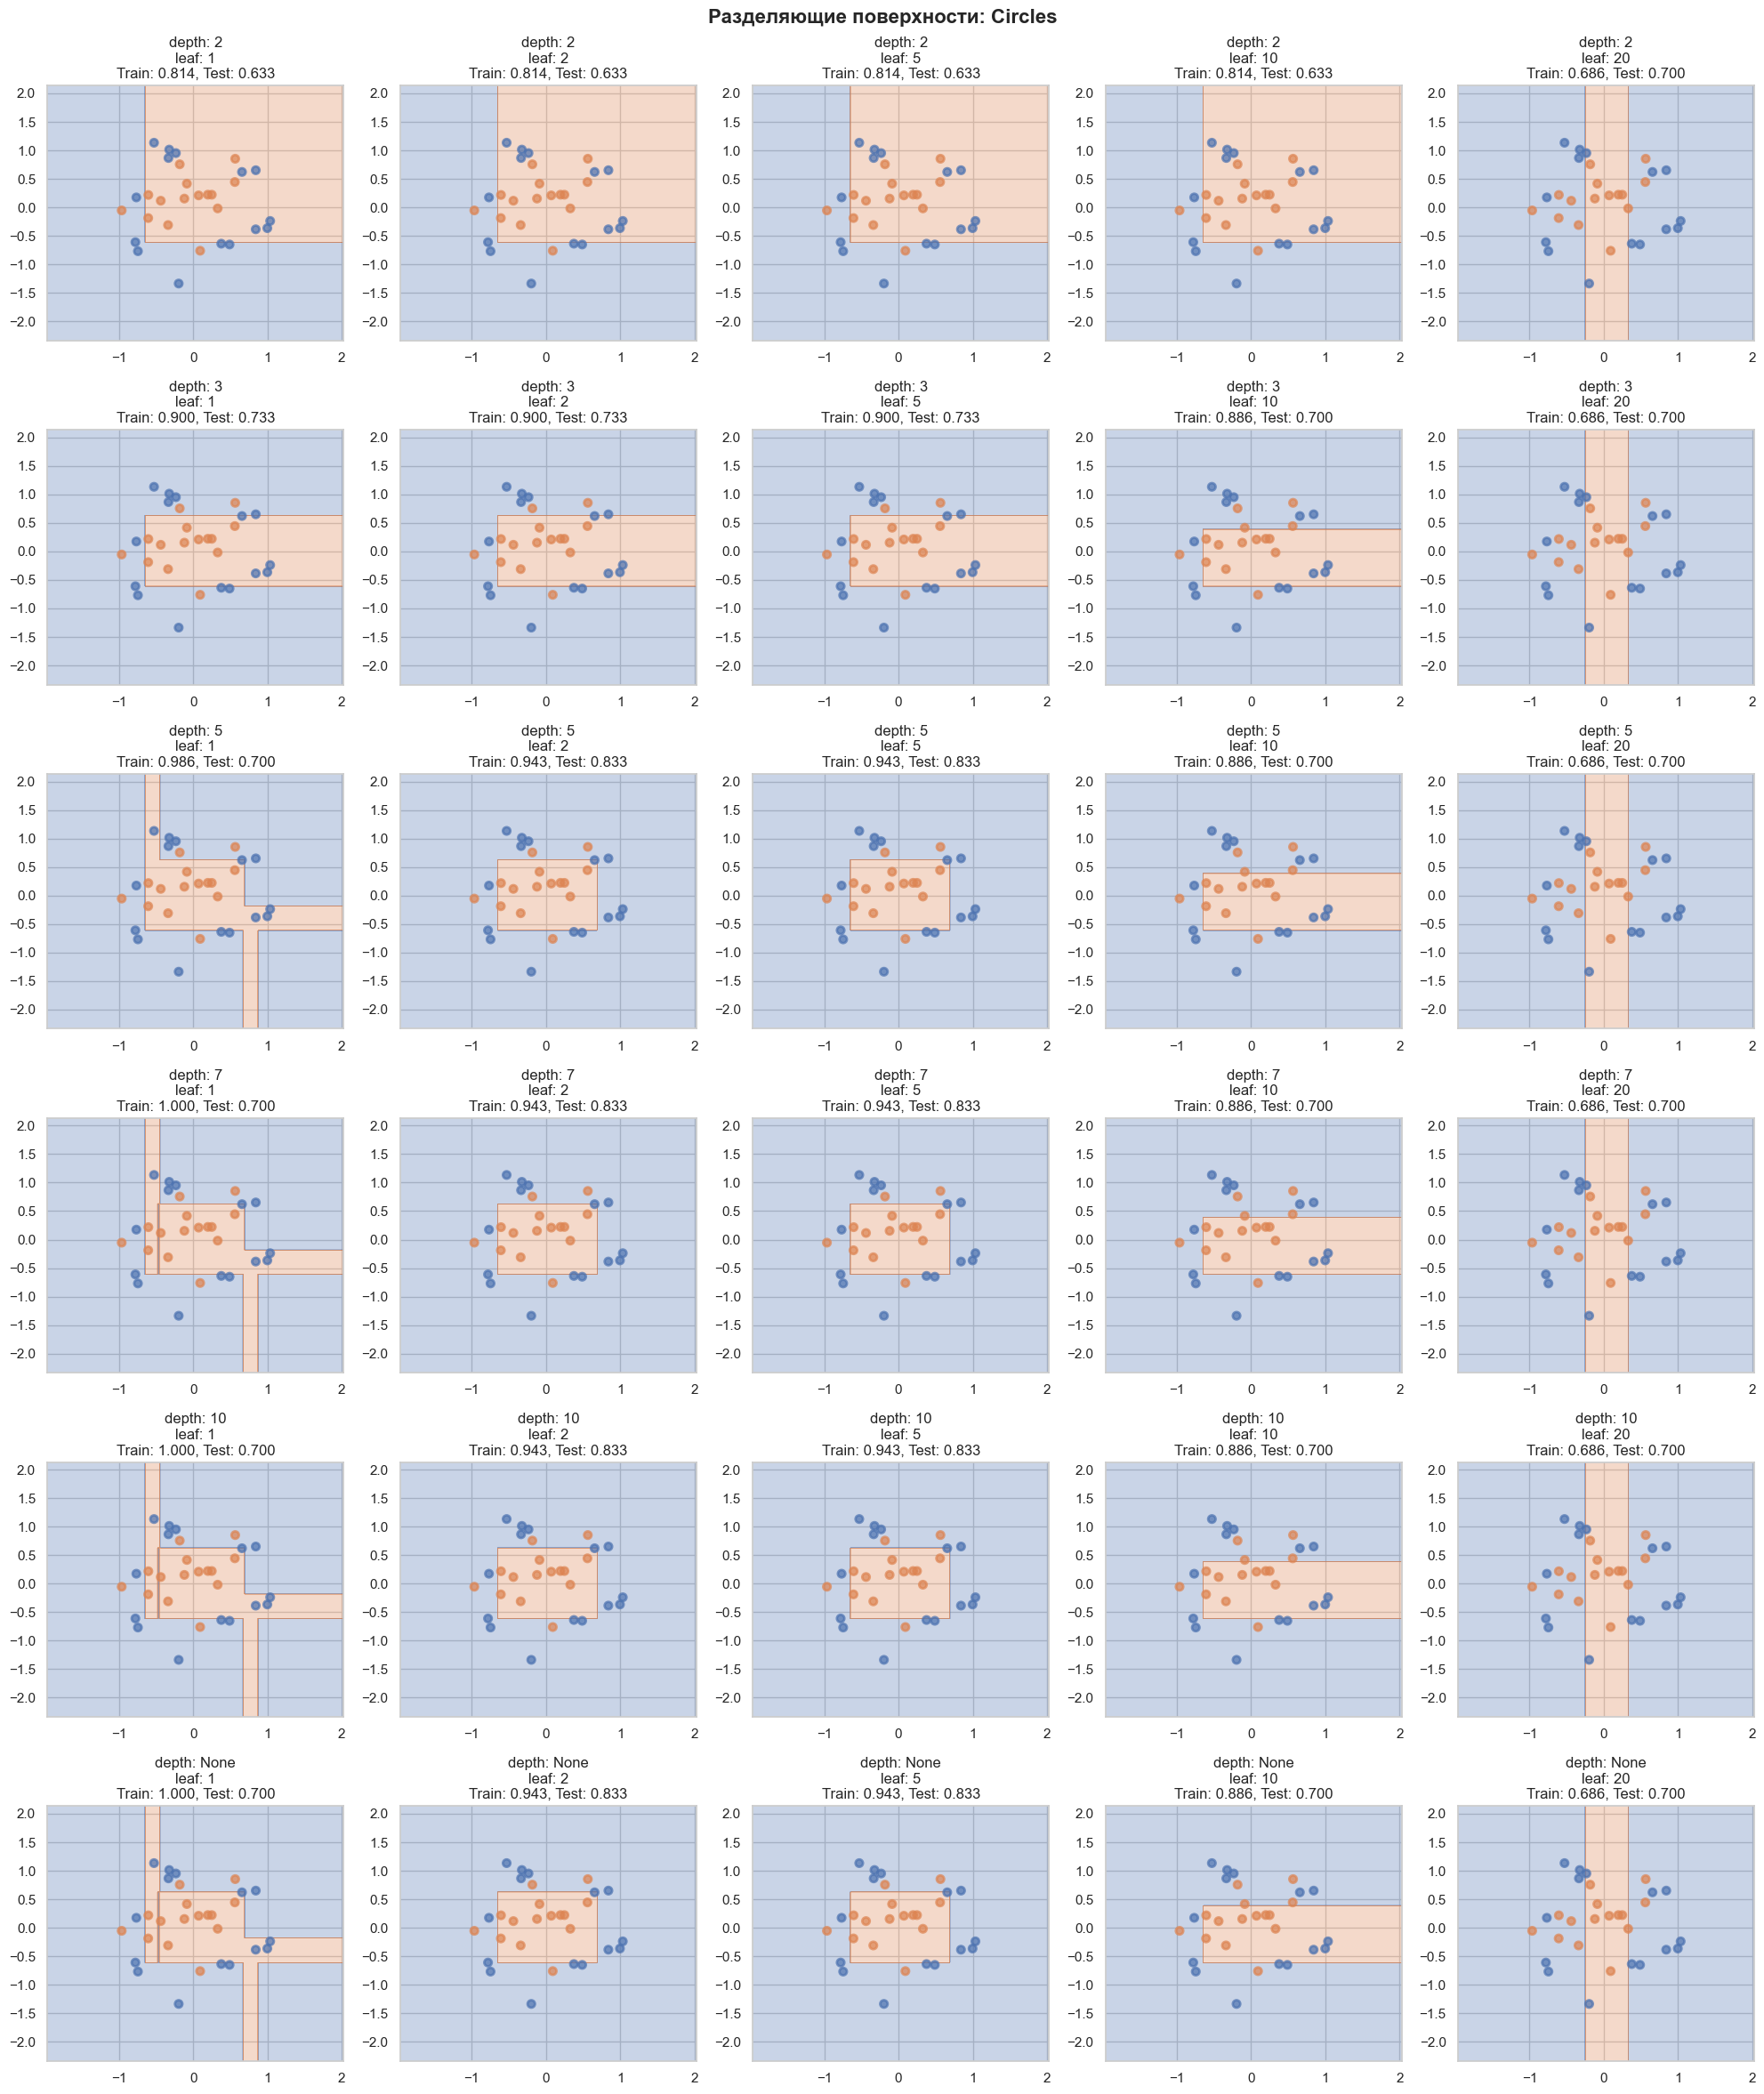

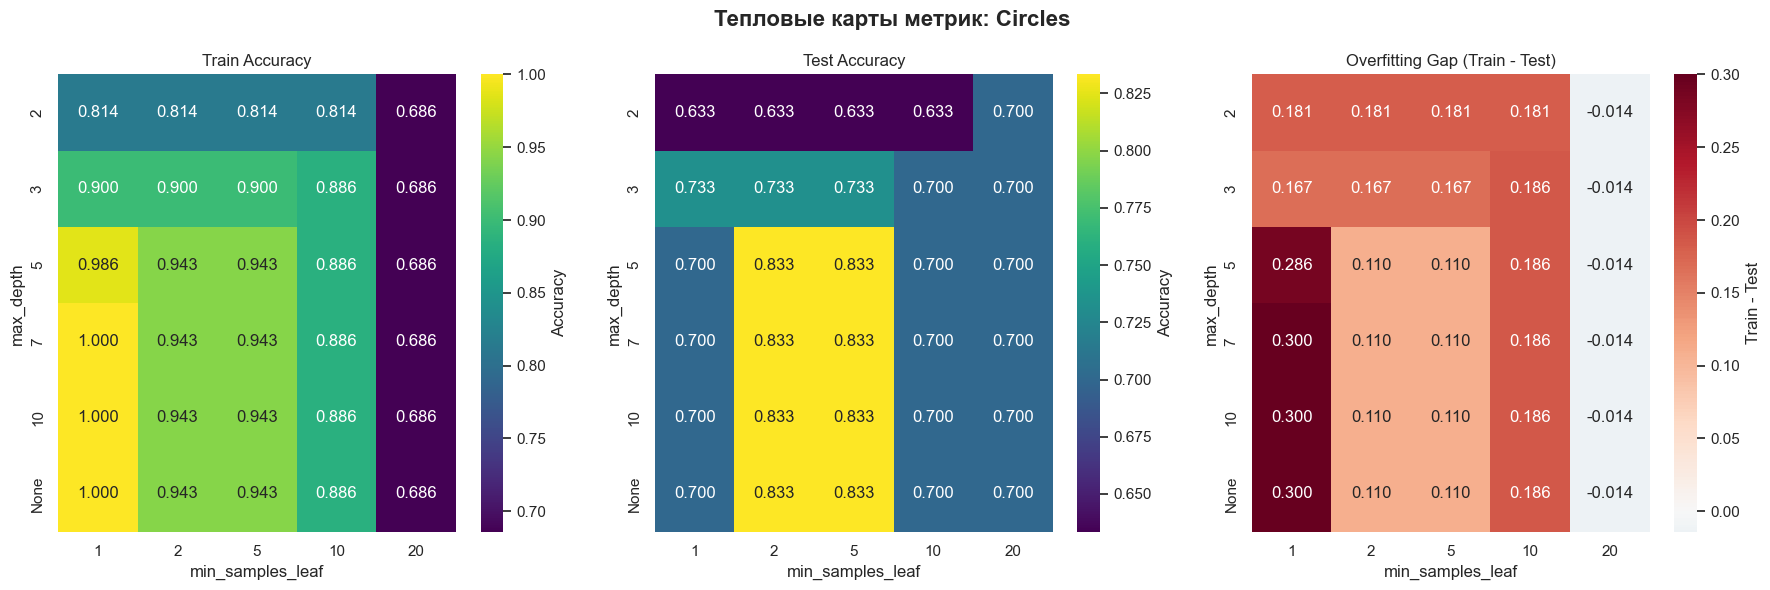


АНАЛИЗ ДЛЯ Circles:
Лучшие параметры:
  max_depth: 5
  min_samples_leaf: 2
  Test Accuracy: 0.833
  Train Accuracy: 0.943
  Overfitting Gap: 0.110
Худшее переобучение:
  Параметры: depth=7, leaf=1
  Overfitting Gap: 0.300

ДАТАСЕТ: Moons


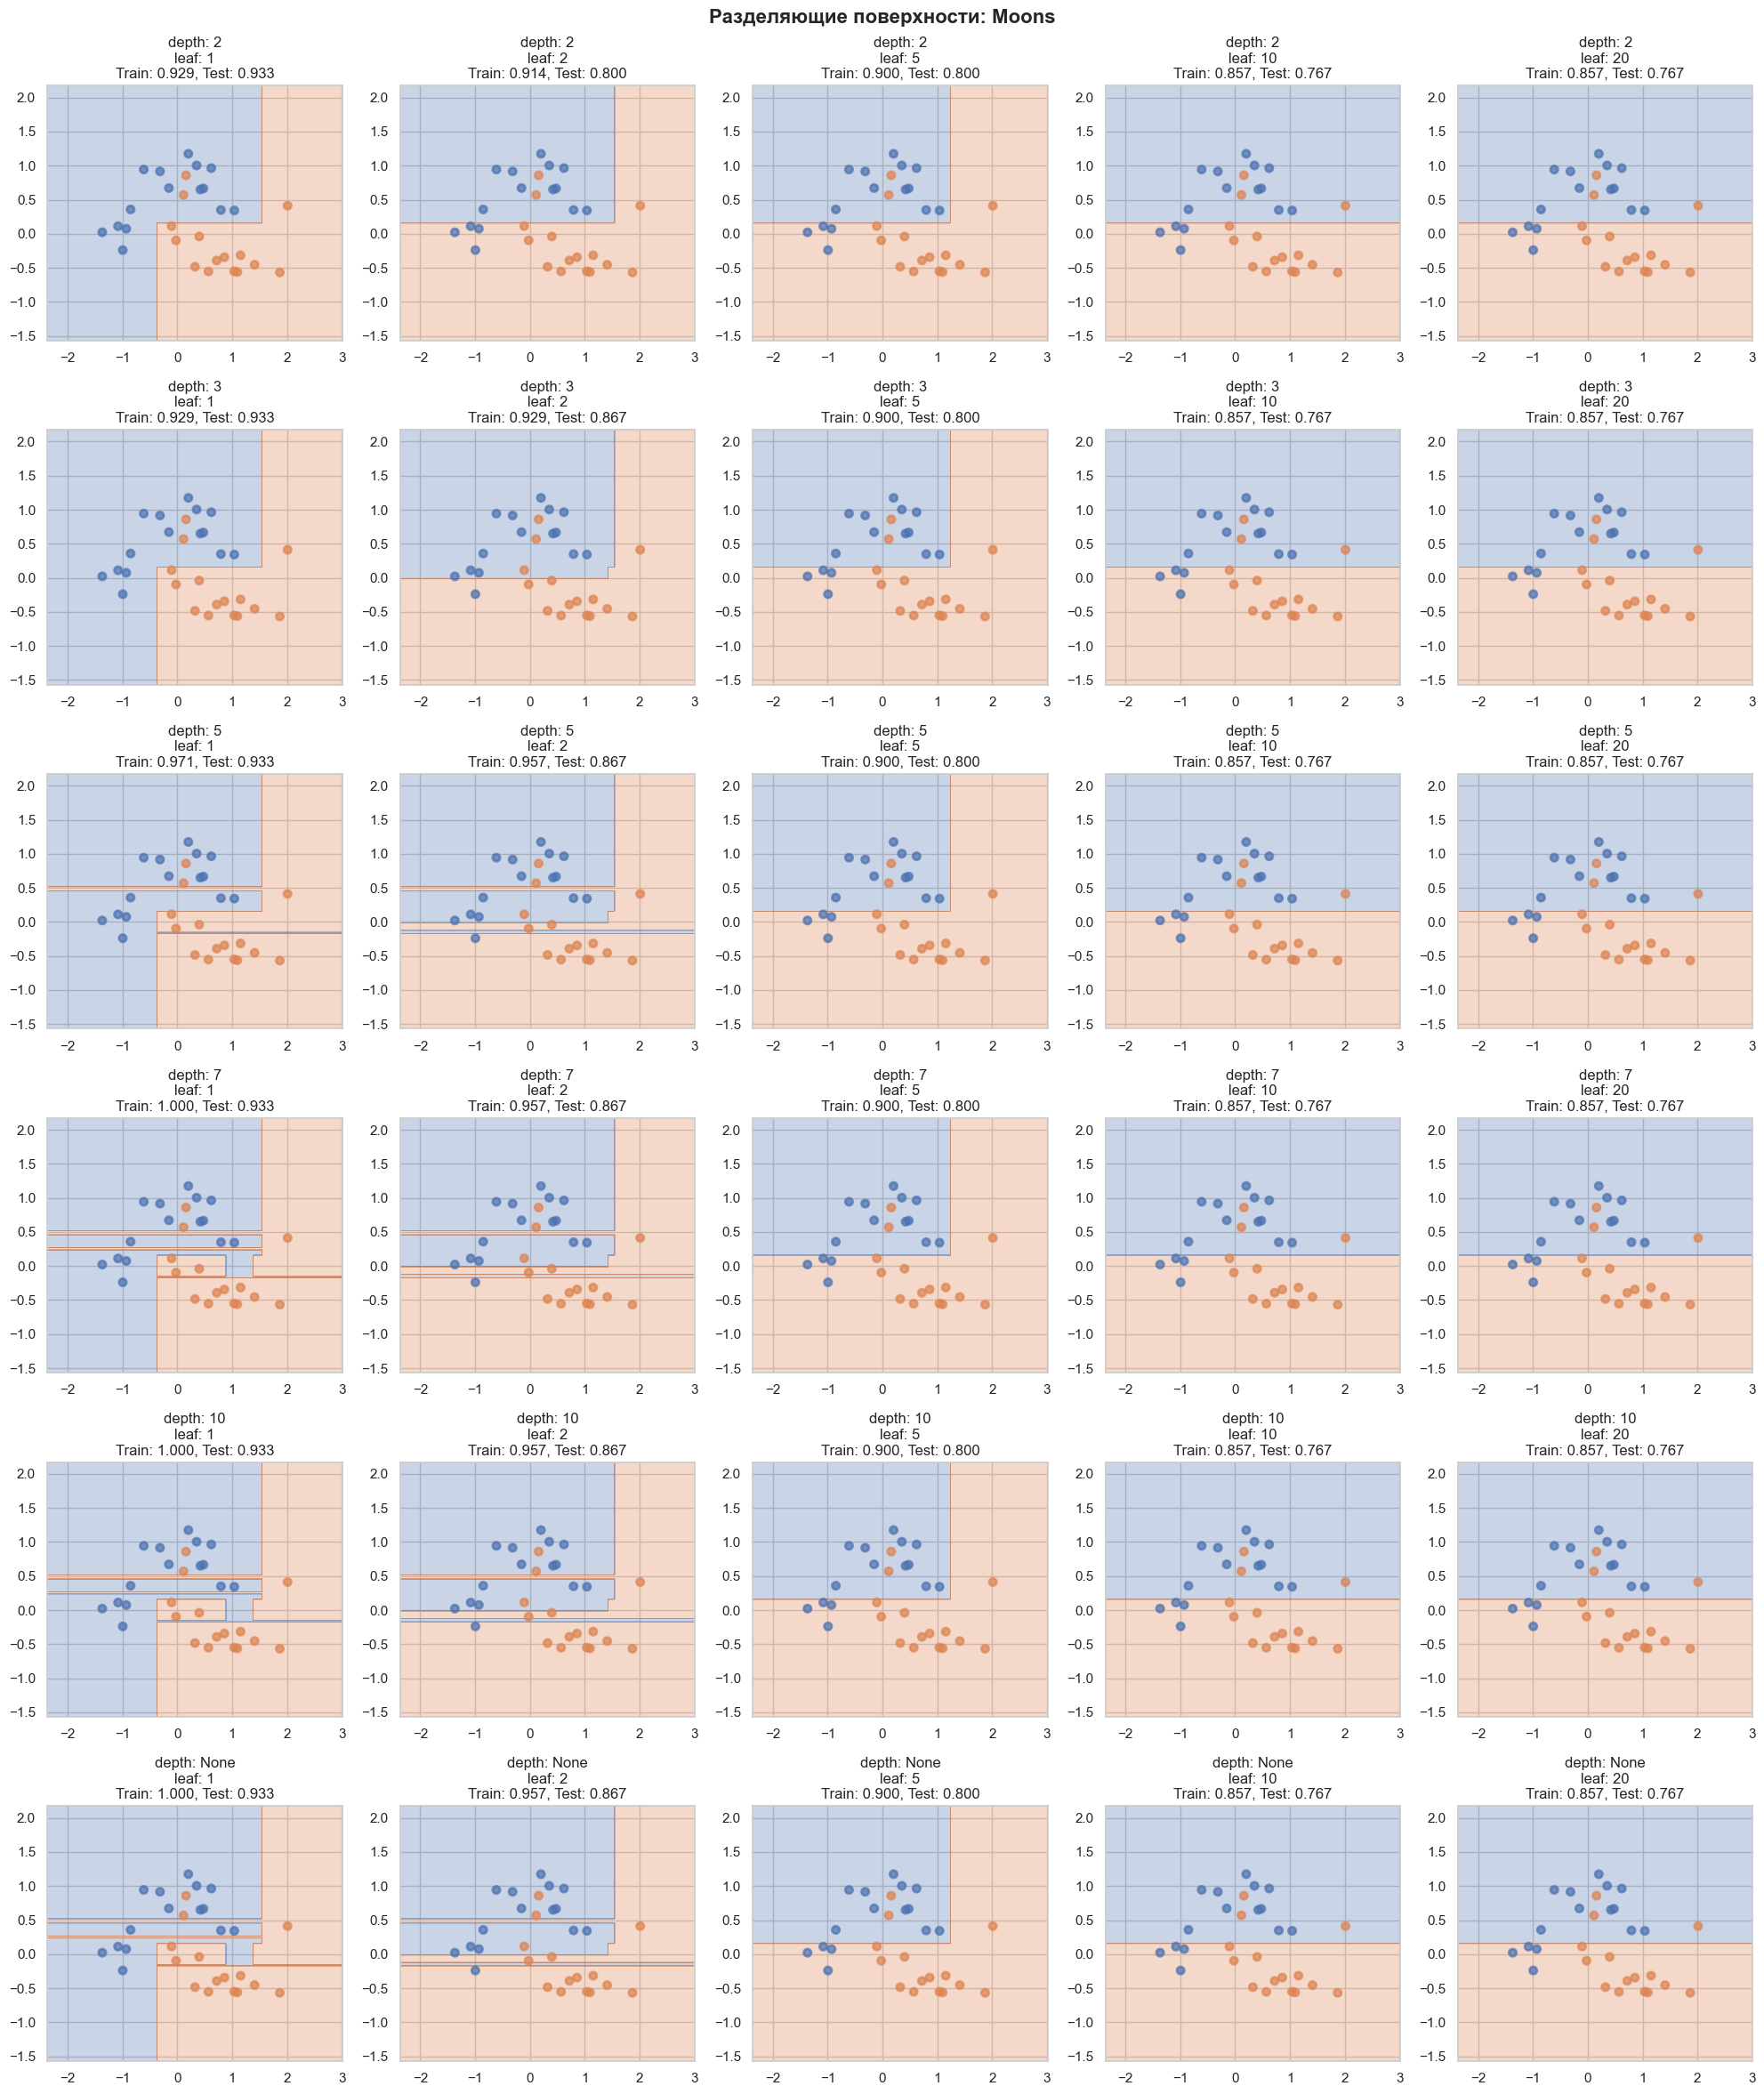

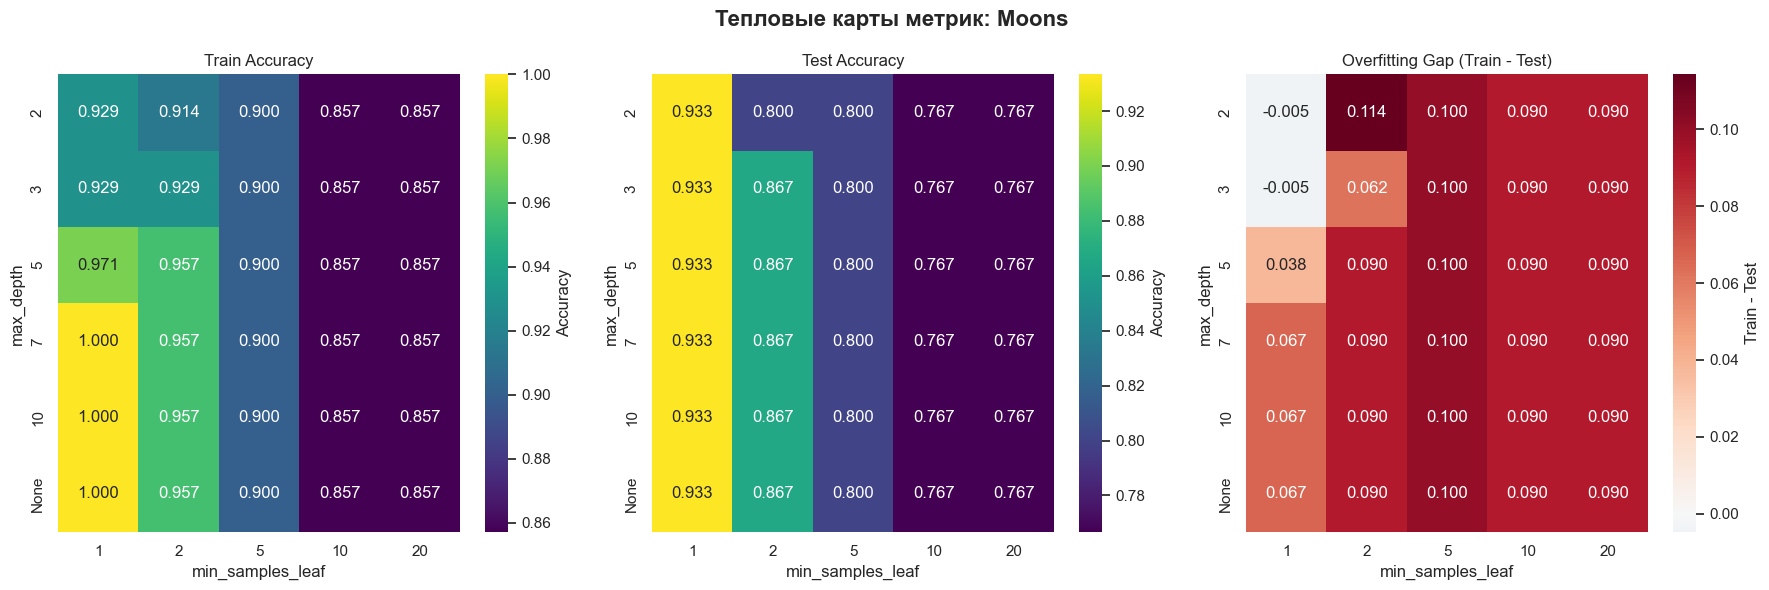


АНАЛИЗ ДЛЯ Moons:
Лучшие параметры:
  max_depth: 2
  min_samples_leaf: 1
  Test Accuracy: 0.933
  Train Accuracy: 0.929
  Overfitting Gap: -0.005
Худшее переобучение:
  Параметры: depth=2, leaf=2
  Overfitting Gap: 0.114

ДАТАСЕТ: Classification


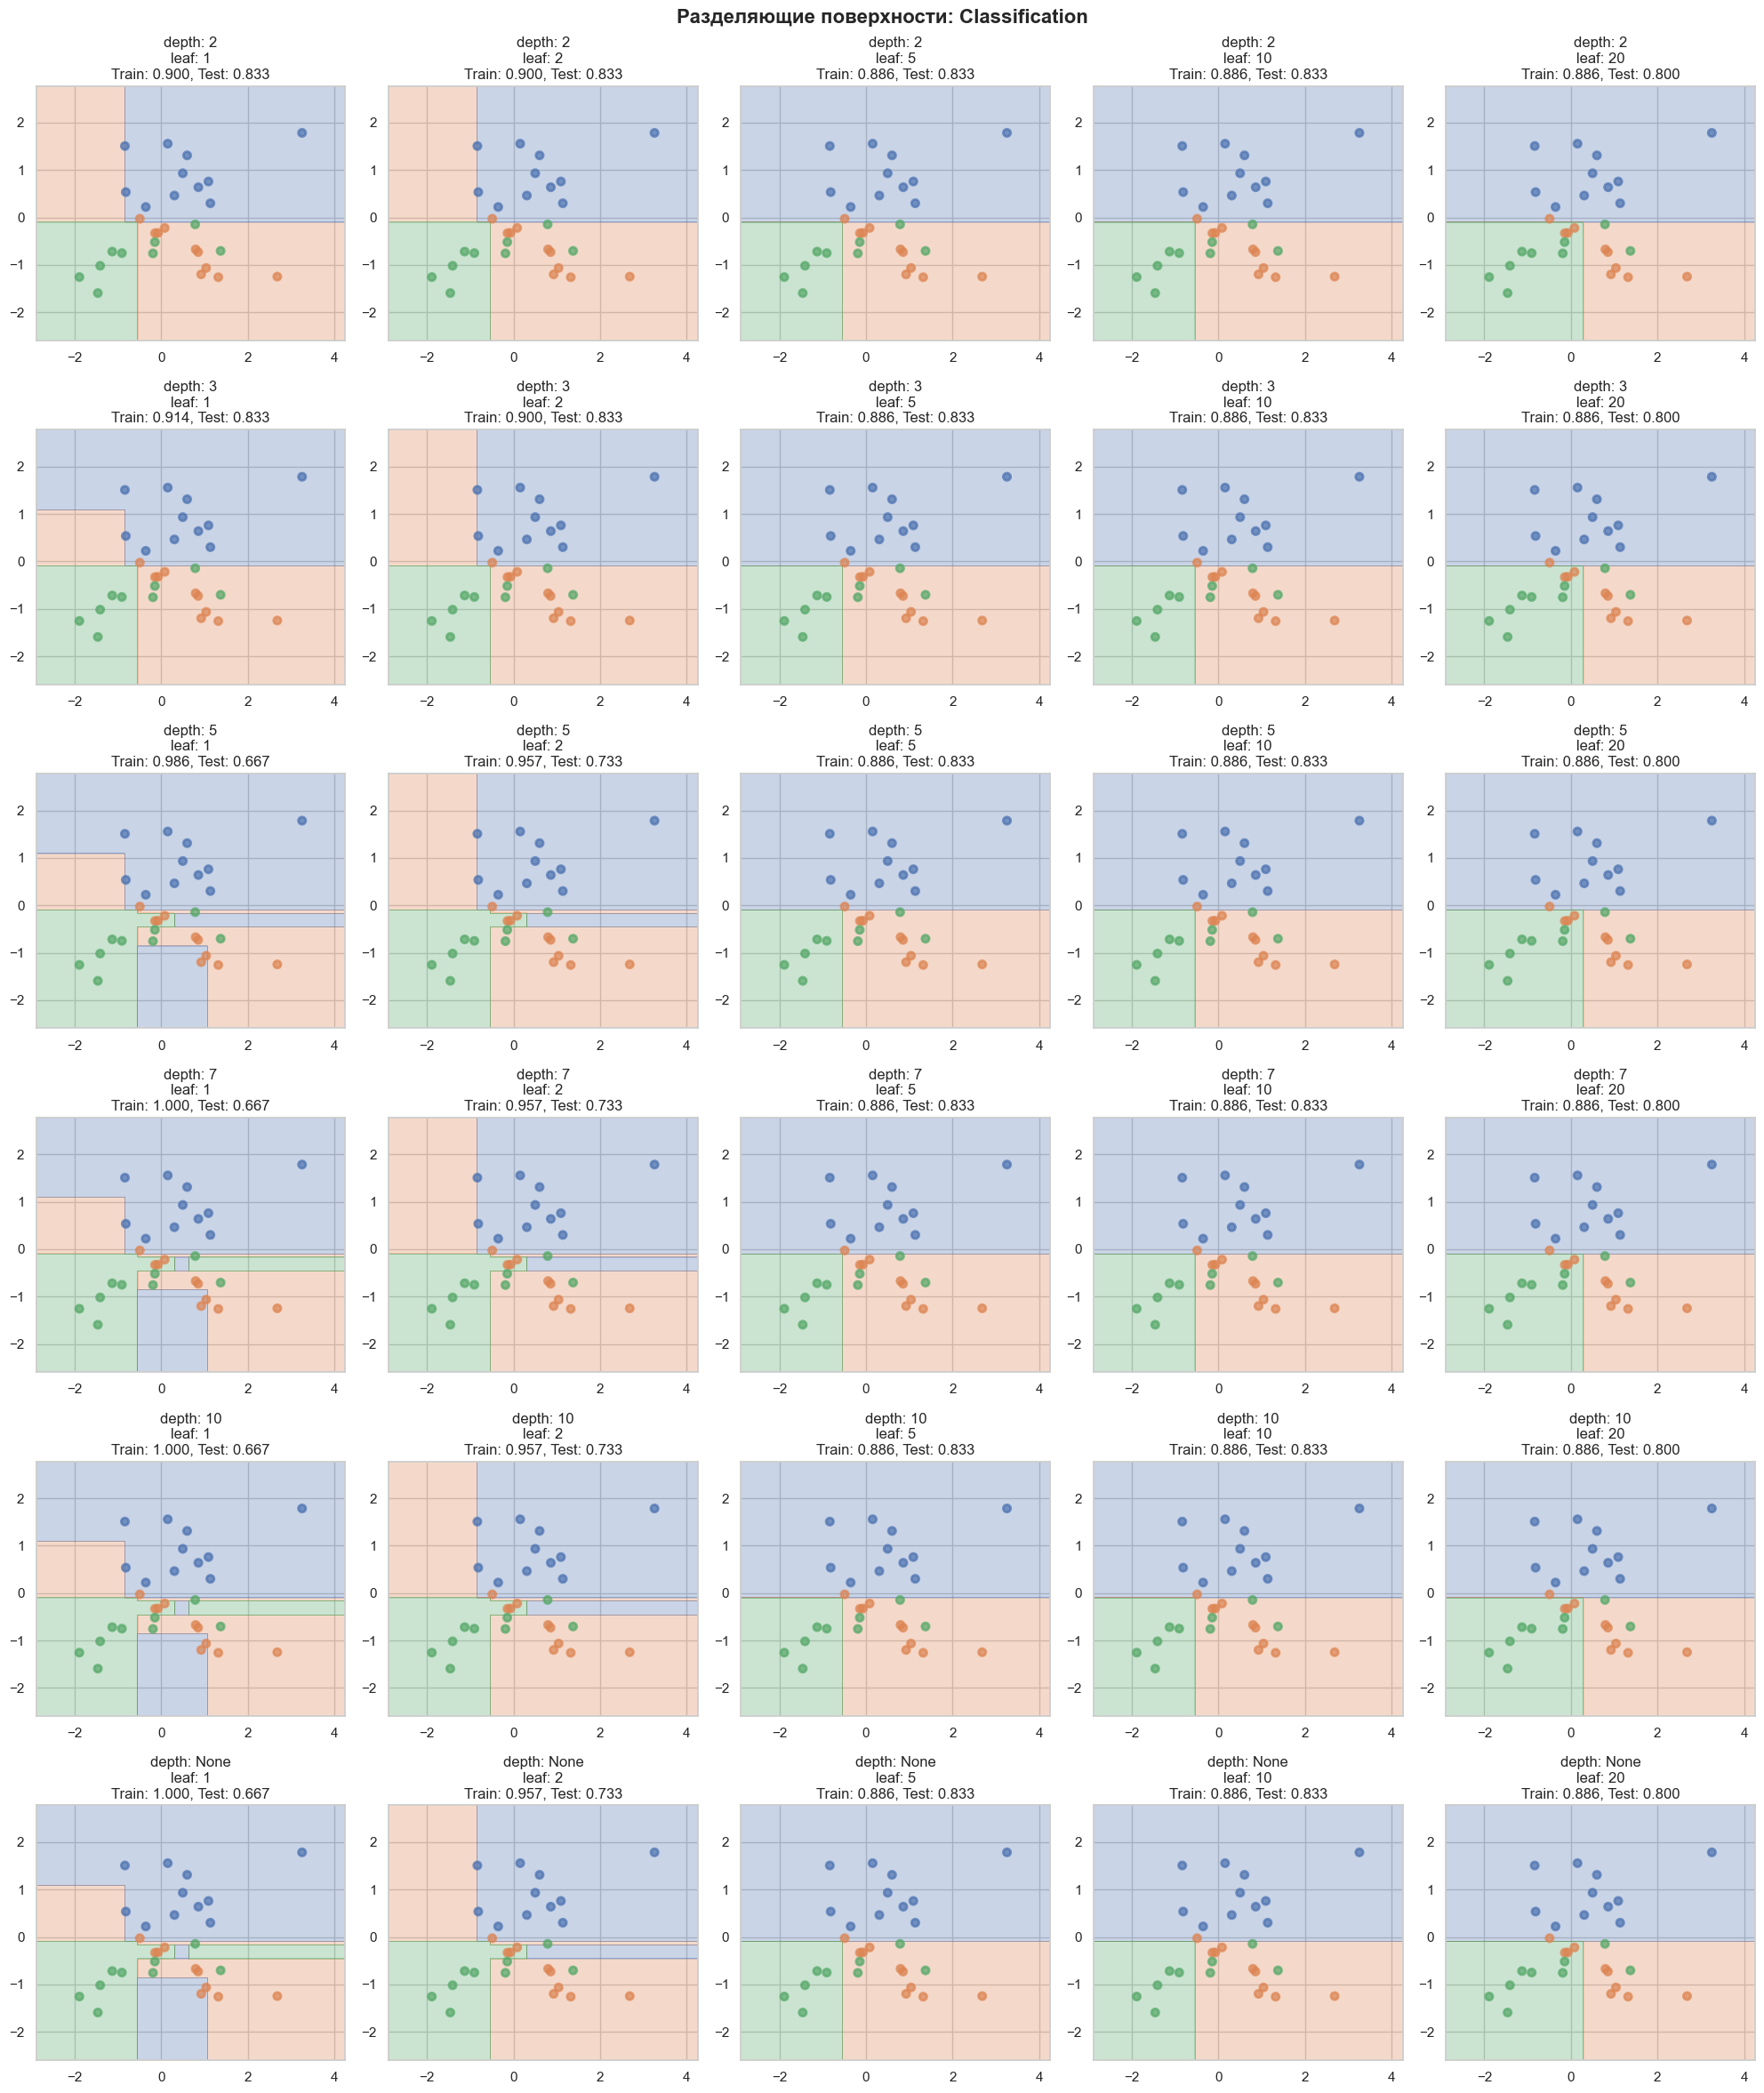

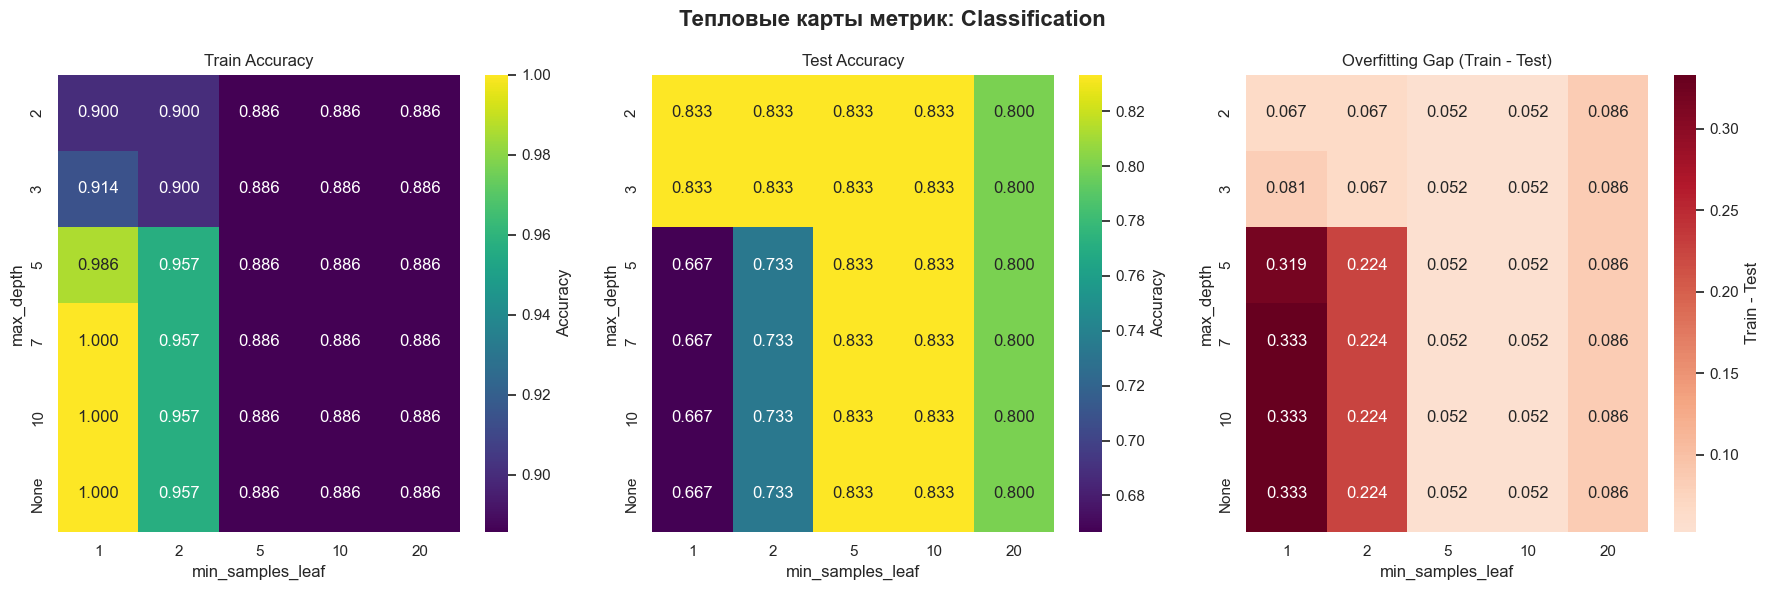


АНАЛИЗ ДЛЯ Classification:
Лучшие параметры:
  max_depth: 2
  min_samples_leaf: 1
  Test Accuracy: 0.833
  Train Accuracy: 0.900
  Overfitting Gap: 0.067
Худшее переобучение:
  Параметры: depth=7, leaf=1
  Overfitting Gap: 0.333


In [36]:
X_splits = []
y_splits = []
for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    X_splits.append((X_train, X_test))
    y_splits.append((y_train, y_test))

max_depths = [2, 3, 5, 7, 10, None]
min_samples_leaves = [1, 2, 5, 10, 20]

for dataset_idx, (name, (X_train, X_test), (y_train, y_test)) in enumerate(zip(
    names, X_splits, y_splits
)):
    print(f"\n{'='*60}")
    print(f"ДАТАСЕТ: {name}")
    print(f"{'='*60}")
    
    train_scores = np.zeros((len(max_depths), len(min_samples_leaves)))
    test_scores = np.zeros((len(max_depths), len(min_samples_leaves)))
    overfitting_gap = np.zeros((len(max_depths), len(min_samples_leaves)))
    
    n_rows = len(max_depths)
    n_cols = len(min_samples_leaves)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))
    fig.suptitle(f'Разделяющие поверхности: {name}\n', fontsize=16, fontweight='bold')
    
    for i, max_depth in enumerate(max_depths):
        for j, min_samples_leaf in enumerate(min_samples_leaves):
            tree = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                random_state=42
            )
            tree.fit(X_train, y_train)
            
            train_acc = accuracy_score(y_train, tree.predict(X_train))
            test_acc = accuracy_score(y_test, tree.predict(X_test))
            
            train_scores[i, j] = train_acc
            test_scores[i, j] = test_acc
            overfitting_gap[i, j] = train_acc - test_acc
            
            ax = axes[i, j]
            plt.sca(ax)
            plot_surface(
                tree, X_test, y_test, 
            )
            ax.set_title(f'depth: {max_depth if max_depth else "None"}\nleaf: {min_samples_leaf}\nTrain: {train_acc:.3f}, Test: {test_acc:.3f}')
    
    plt.tight_layout()
    plt.show()
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f'Тепловые карты метрик: {name}', fontsize=16, fontweight='bold')
    
    sns.heatmap(
        train_scores, 
        annot=True, fmt='.3f',
        xticklabels=min_samples_leaves,
        yticklabels=[str(d) if d else 'None' for d in max_depths],
        ax=axes[0], cmap='viridis', cbar_kws={'label': 'Accuracy'}
    )
    axes[0].set_title('Train Accuracy')
    axes[0].set_xlabel('min_samples_leaf')
    axes[0].set_ylabel('max_depth')
    
    sns.heatmap(
        test_scores, 
        annot=True, fmt='.3f',
        xticklabels=min_samples_leaves,
        yticklabels=[str(d) if d else 'None' for d in max_depths],
        ax=axes[1], cmap='viridis', cbar_kws={'label': 'Accuracy'}
    )
    axes[1].set_title('Test Accuracy')
    axes[1].set_xlabel('min_samples_leaf')
    axes[1].set_ylabel('max_depth')
    
    sns.heatmap(
        overfitting_gap, 
        annot=True, fmt='.3f',
        xticklabels=min_samples_leaves,
        yticklabels=[str(d) if d else 'None' for d in max_depths],
        ax=axes[2], cmap='RdBu_r', center=0, cbar_kws={'label': 'Train - Test'}
    )
    axes[2].set_title('Overfitting Gap (Train - Test)')
    axes[2].set_xlabel('min_samples_leaf')
    axes[2].set_ylabel('max_depth')
    
    plt.tight_layout()
    plt.show()
    
    best_test_idx = np.unravel_index(np.argmax(test_scores), test_scores.shape)
    best_max_depth = max_depths[best_test_idx[0]]
    best_min_samples_leaf = min_samples_leaves[best_test_idx[1]]
    
    print(f"\nАНАЛИЗ ДЛЯ {name}:")
    print(f"Лучшие параметры:")
    print(f"  max_depth: {best_max_depth}")
    print(f"  min_samples_leaf: {best_min_samples_leaf}")
    print(f"  Test Accuracy: {test_scores[best_test_idx]:.3f}")
    print(f"  Train Accuracy: {train_scores[best_test_idx]:.3f}")
    print(f"  Overfitting Gap: {overfitting_gap[best_test_idx]:.3f}")
    
    worst_overfit_idx = np.unravel_index(np.argmax(overfitting_gap), overfitting_gap.shape)
    print(f"Худшее переобучение:")
    print(f"  Параметры: depth={max_depths[worst_overfit_idx[0]]}, leaf={min_samples_leaves[worst_overfit_idx[1]]}")
    print(f"  Overfitting Gap: {overfitting_gap[worst_overfit_idx]:.3f}")


__Ответ:__   
Глубина дерева: на большой глубине все модели сильно переобучаются. При глубине 2-5 модели показывают наименьшее значение переобучения.

Количество листьев: переобучение моделей на разных датасетах показало себя по разному. Лучшие значения у кругов - 2-5, лун - 1, классификация 5-10. При очень большом количестве листьев все модели начинают в целом плохо предсказывать.

Вывод: оптимальные параметры сильно зависят от геометрии данных, но существует диапазон (глубина 2-5, листья 2-10), который наиболее вероятно обеспечит баланс между сложностью модели и обобщающей способностью.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

    STG   SCG   STR   LPR   PEG  UNS
0  0.00  0.00  0.00  0.00  0.00    0
1  0.08  0.08  0.10  0.24  0.90    1
2  0.06  0.06  0.05  0.25  0.33    0
3  0.10  0.10  0.15  0.65  0.30    1
4  0.08  0.08  0.08  0.98  0.24    0


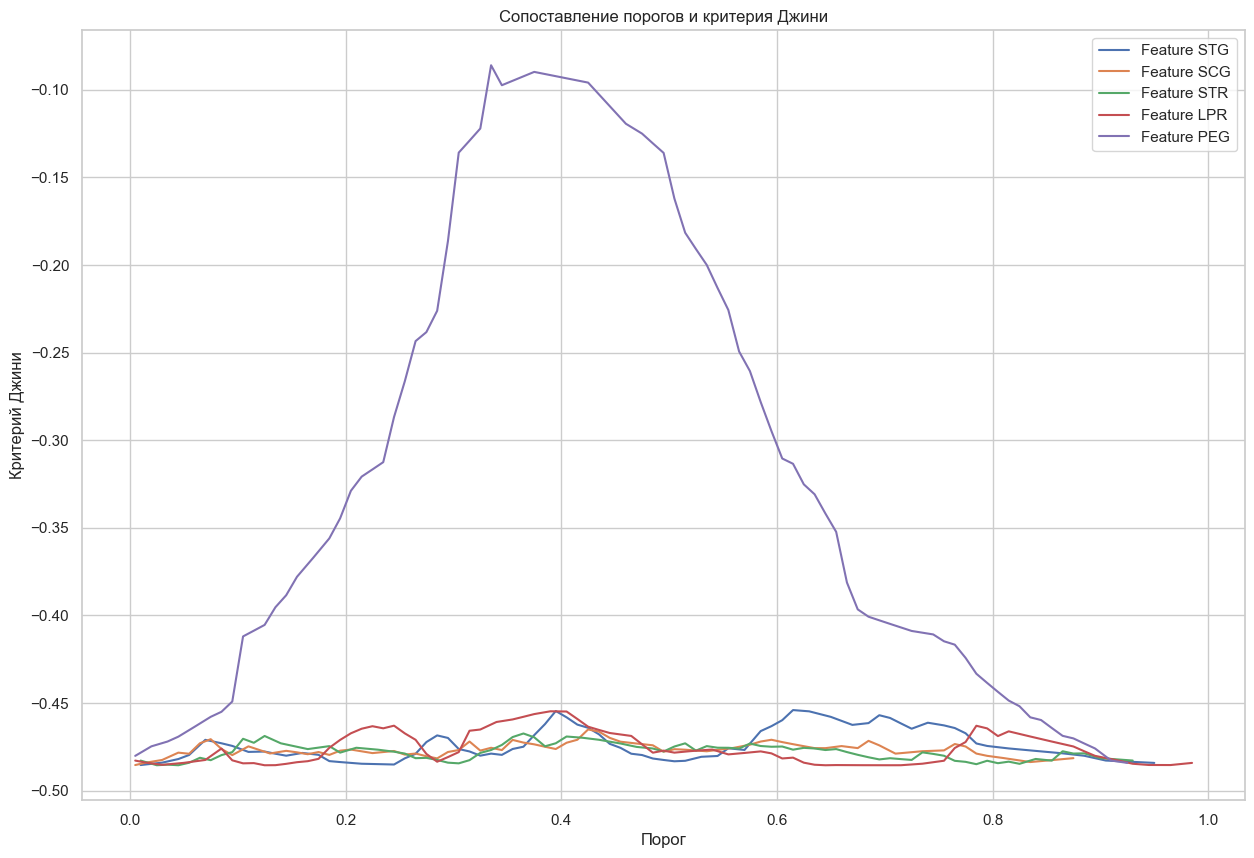

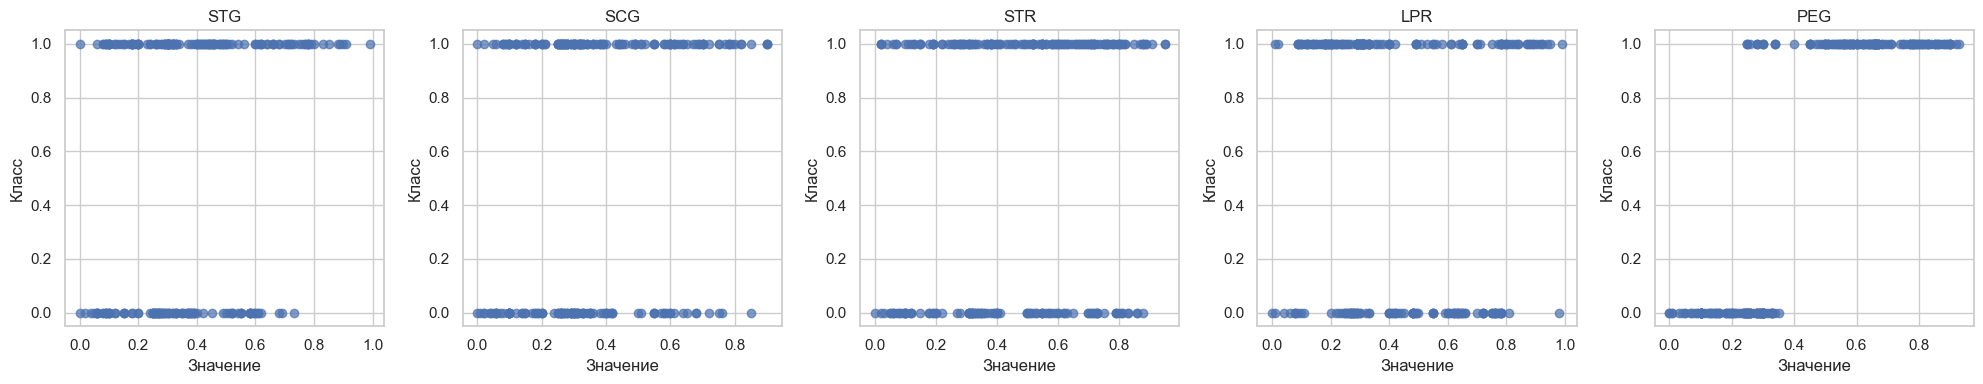

In [37]:
from hw2code import find_best_split

df = pd.read_csv("./datasets/students.csv")
print(df.head())

features_table = df.iloc[:, :-1]
y = df.iloc[:, -1].values

plt.figure(figsize=(15, 10))

for i, col in enumerate(features_table.columns):
    thresholds, ginis, _, _ = find_best_split(features_table[col].values, y)
    plt.plot(thresholds, ginis, label=f'Feature {col}')

plt.title("Сопоставление порогов и критерия Джини")
plt.xlabel("Порог")
plt.ylabel("Критерий Джини")
plt.legend()
plt.grid(True)
plt.show()

_, axs = plt.subplots(1, 5, figsize=(20, 4))
for i, col in enumerate(features_table.columns):
    axs[i].scatter(features_table[col], y, alpha=0.7)
    axs[i].set_title(f'{col}')
    axs[i].set_xlabel("Значение")
    axs[i].set_ylabel("Класс")

plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

Признак PEG лучше всего подходит для разделения выборки на два поддерева. Явный порог разделения (около 0.35) виден и на кривой (максимум) и на scatter-графике (почти все 0 левее, а 1 правее). Кривая у "хороших" признаков имеет явно выраженный максимум близкий к 0. Кривые для "плохих" кривых плоские, не имеют высоких максимумов, достаточно плавно изменяются и все значения близки к -0.5.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from hw2code import DecisionTree

def tree_depth(node):
    if node["type"] == "terminal":
        return 0
    l  = tree_depth(node["left_child"])
    r = tree_depth(node["right_child"])
    return 1 + max(l, r)

df = pd.read_csv("./datasets/agaricus-lepiota.data", header=None)

le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

feature_types = ["categorical"] * X.shape[1]
tree = DecisionTree(feature_types)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

depth = tree_depth(tree._tree)
print(f"Depth: {depth}")

Accuracy: 1.00
Depth: 7


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

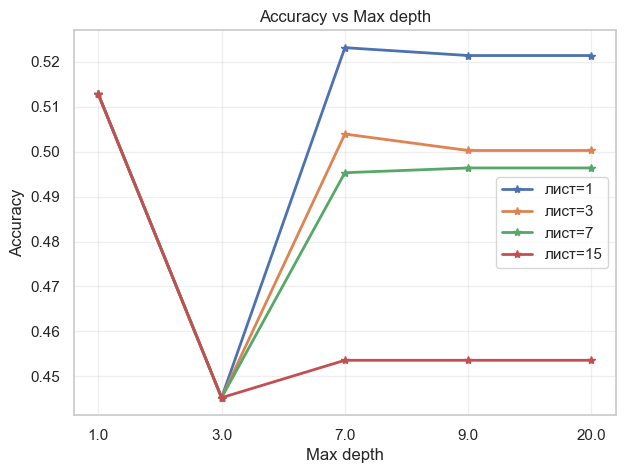

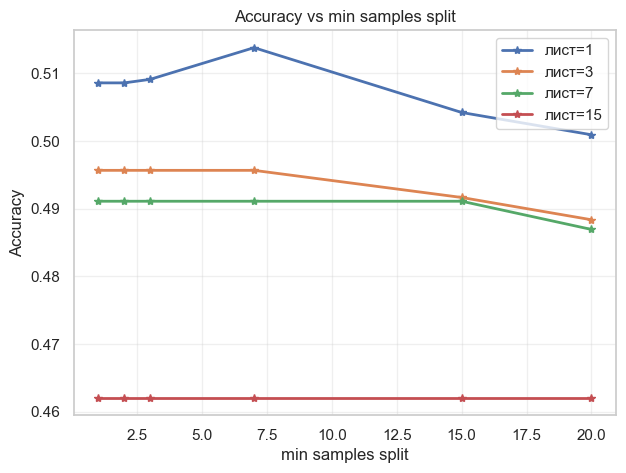

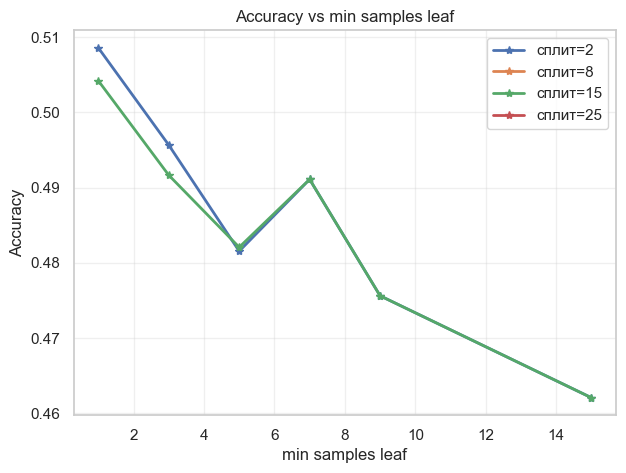

In [39]:
from sklearn.model_selection import cross_val_score

df = pd.read_csv("datasets/tic-tac-toe-endgame.csv")

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X = X.apply(LabelEncoder().fit_transform)

enc = LabelEncoder()
y = enc.fit_transform(y)

feature_types = ["categorical"] * X.shape[1]

params = {
    'max_depth': [None, 1, 3, 7, 9, 20],
    'min_samples_split': [1, 2, 3, 7, 15, 20],
    'min_samples_leaf': [1, 3, 5, 7, 9, 15]
}

results = []

for md in params['max_depth']:
    for mss in params['min_samples_split']:
        for msl in params['min_samples_leaf']:
            tree = DecisionTree(feature_types,
                                max_depth=md,
                                min_samples_split=mss,
                                min_samples_leaf=msl)
            scores = cross_val_score(
                tree,
                X.values,
                y,
                cv=5,
                scoring='accuracy'
            )
            results.append({
                'max_depth': md,
                'min_samples_split': mss,
                'min_samples_leaf': msl,
                'accuracy_mean': scores.mean()
            })

res = pd.DataFrame(results)
plt.figure(figsize=(7,5))
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.grid(alpha=0.3)
for msl in [1, 3, 7, 15]:
    sub = res[res['min_samples_leaf']==msl]
    means = sub.groupby('max_depth')['accuracy_mean'].mean()
    plt.plot(means.index.astype(str), means.values, marker='*', linewidth=2, label=f"лист={msl}")
plt.legend()
plt.title("Accuracy vs Max depth")
plt.show()

plt.figure(figsize=(7,5))
plt.xlabel("min samples split")
plt.ylabel("Accuracy")
plt.grid(alpha=0.3)
for msl in [1, 3, 7, 15]:
    sub = res[res['min_samples_leaf']==msl]
    means = sub.groupby('min_samples_split')['accuracy_mean'].mean()
    plt.plot(means.index, means.values, marker='*', linewidth=2, label=f"лист={msl}")
plt.legend()
plt.title("Accuracy vs min samples split")
plt.show()

plt.figure(figsize=(7,5))
plt.xlabel("min samples leaf")
plt.ylabel("Accuracy")
plt.grid(alpha=0.3)
for mss in [2, 8, 15, 25]:
    sub = res[res['min_samples_split']==mss]
    means = sub.groupby('min_samples_leaf')['accuracy_mean'].mean()
    plt.plot(means.index, means.values, marker='*', linewidth=2, label=f"сплит={mss}")

plt.legend()
plt.title("Accuracy vs min samples leaf")
plt.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.tree import DecisionTreeClassifier

def load_and_prepare_data(dataset_name, verbose = False):
    if dataset_name == "mushrooms":
        df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", header=None)
        X = df.iloc[:, 1:]
        y = df.iloc[:, 0]
        y = LabelEncoder().fit_transform(y)
        
    elif dataset_name == "tic-tac-toe":
        df = pd.read_csv("datasets/tic-tac-toe-endgame.csv")
        X = df.iloc[:, :-1]
        y = df.iloc[:, -1]
        y = LabelEncoder().fit_transform(y)
        
    elif dataset_name == "cars":
        df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data", header=None)
        X = df.iloc[:, :-1]
        y = df.iloc[:, -1]
        class_mapping = {'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1}
        y = y.map(class_mapping)
        y = y.values
        
    elif dataset_name == "nursery":
        df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data", header=None)
        X = df.iloc[:, :-1]
        y = df.iloc[:, -1]
        class_mapping = {'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1}
        y = y.map(class_mapping)
        y = y.values
    
    X_encoded = X.apply(LabelEncoder().fit_transform)
    
    ohe = OneHotEncoder(sparse_output=False)
    X_ohe = ohe.fit_transform(X)
    if verbose:
     print(df.head())
    return X_encoded.values, X_ohe, y

datasets = ["mushrooms", "tic-tac-toe", "cars", "nursery"]
results = []

for dataset_name in datasets:
    X_encoded, X_ohe, y = load_and_prepare_data(dataset_name, verbose=True)
    
    tree_real = DecisionTree(feature_types=["real"] * X_encoded.shape[1])
    scores_real = cross_val_score(tree_real, X_encoded, y, cv=10, scoring=make_scorer(accuracy_score))
    
    tree_cat = DecisionTree(feature_types=["categorical"] * X_encoded.shape[1])
    scores_cat = cross_val_score(tree_cat, X_encoded, y, cv=10, scoring=make_scorer(accuracy_score))
    
    tree_real_ohe = DecisionTree(feature_types=["real"] * X_ohe.shape[1])
    scores_real_ohe = cross_val_score(tree_real_ohe, X_ohe, y, cv=10, scoring=make_scorer(accuracy_score))
    
    tree_sklearn = DecisionTreeClassifier(random_state=42)
    scores_sklearn = cross_val_score(tree_sklearn, X_encoded, y, cv=10, scoring=make_scorer(accuracy_score))
    
    results.append({
        'dataset': dataset_name,
        'Real_Features': scores_real.mean(),
        'Categorical_Features': scores_cat.mean(),
        'Real_OHE': scores_real_ohe.mean(),
        'Sklearn_DT': scores_sklearn.mean()
    })

  0  1  2  3  4  5  6  7  8  9   ... 13 14 15 16 17 18 19 20 21 22
0  p  x  s  n  t  p  f  c  n  k  ...  s  w  w  p  w  o  p  k  s  u
1  e  x  s  y  t  a  f  c  b  k  ...  s  w  w  p  w  o  p  n  n  g
2  e  b  s  w  t  l  f  c  b  n  ...  s  w  w  p  w  o  p  n  n  m
3  p  x  y  w  t  p  f  c  n  n  ...  s  w  w  p  w  o  p  k  s  u
4  e  x  s  g  f  n  f  w  b  k  ...  s  w  w  p  w  o  e  n  a  g

[5 rows x 23 columns]
  V1 V2 V3 V4 V5 V6 V7 V8 V9       V10
0  x  x  x  x  o  o  x  o  o  positive
1  x  x  x  x  o  o  o  x  o  positive
2  x  x  x  x  o  o  o  o  x  positive
3  x  x  x  x  o  o  o  b  b  positive
4  x  x  x  x  o  o  b  o  b  positive
       0      1  2  3      4     5      6
0  vhigh  vhigh  2  2  small   low  unacc
1  vhigh  vhigh  2  2  small   med  unacc
2  vhigh  vhigh  2  2  small  high  unacc
3  vhigh  vhigh  2  2    med   low  unacc
4  vhigh  vhigh  2  2    med   med  unacc
       0       1         2  3           4           5              6  \
0  usual  proper 

In [22]:
results_df = pd.DataFrame(results)
results_df = results_df.set_index('dataset')
print("\nРезультаты сравнения алгоритмов:")
print(results_df.round(4))

print("\nРазмеры datasets:")
for dataset_name in datasets:
    X_encoded, _, y = load_and_prepare_data(dataset_name)
    print(f"{dataset_name}: {X_encoded.shape[0]} samples, {X_encoded.shape[1]} features, {len(np.unique(y))} classes")


Результаты сравнения алгоритмов:
             Real_Features  Categorical_Features  Real_OHE  Sklearn_DT
dataset                                                               
mushrooms           0.9993                1.0000    0.9996      0.9604
tic-tac-toe         0.4675                0.5414    0.5436      0.7717
cars                0.9426                0.9675    0.9195      0.9427
nursery             0.9997                0.9998    0.9995      0.9997

Размеры datasets:
mushrooms: 8124 samples, 22 features, 2 classes
tic-tac-toe: 958 samples, 9 features, 2 classes
cars: 1728 samples, 6 features, 2 classes
nursery: 12960 samples, 8 features, 2 classes


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Все рассматриваемые датасеты состоят из категориальных признаков, что объясняет высокие результаты алгоритмов, работающих с категориальными признаками напрямую. Наилучшее качество достигнуто на датасетах mushrooms и nursery, где данные хорошо разделимы. Худшие показатели на датасете tic-tac-toe связаны со сложной комбинаторной природой данных - состояния игровой доски требуют сложных разделяющих правил.

Присутствующая компонента случайности обусловлена процедурой кросс-валидации и может быть уменьшена увеличением числа фолдов или фиксацией random_state. Sklearn DecisionTreeClassifier показал конкурентные результаты благодаря оптимизированным алгоритмам разделения и встроенной регуляризации. Для категориальных данных рекомендуется использовать специализированные алгоритмы или корректно преобразовывать признаки с учетом их природы.

Вставьте что угодно, описывающее ваши впечатления от этого задания:

# ОКАК